In [5]:
import requests
import matplotlib.pyplot as plt
import pandas as pd
import json

Make an API request that returns the months where "fire" was searched in 2016. Which month had the most searches?



In [6]:
import requests

url = "https://data.nashville.gov/resource/fuaa-r5cm.json?$where=incident_type_description='Fire' AND year(received_dtm)=2016&$select=month(received_dtm)"

response = requests.get(url)

calls_500 = response.json()

print(calls_500)

{'message': 'Query coordinator error: query.soql.no-such-column; No such column: received_dtm; position: Map(row -> 1, column -> 14, line -> "SELECT month(`received_dtm`) AS `month_received_dtm` WHERE `incident_type_description` = \\"Fire\\" AND year(`received_dtm`) = 2016\\n             ^")', 'errorCode': 'query.soql.no-such-column', 'data': {'column': 'received_dtm', 'dataset': 'alpha.6008', 'position': {'row': 1, 'column': 14, 'line': 'SELECT month(`received_dtm`) AS `month_received_dtm` WHERE `incident_type_description` = "Fire" AND year(`received_dtm`) = 2016\n             ^'}}}


In [7]:
endpoint = 'https://data.nashville.gov/resource/fuaa-r5cm.json'
response = requests.get(endpoint)
response
params = {
    "Year": "2016",
    "Query Text": "fire"
}
response = requests.get(endpoint, params = params)
res = response.json()
res
query_fire = pd.DataFrame(res)
query_fire
print(query_fire[query_fire['query_count'] == query_fire['query_count'].max()])

  month_name  year query_count query_text
7     August  2016          47       fire


Make an API request that returns all the times a query was run more than 100 times in a month. How many times did this occur?

In [27]:
endpoint = "https://data.nashville.gov/resource/fuaa-r5cm.json"
response = requests.get(endpoint)
json_data = response.json()

params2 = {
    "$where": "query_count > 100",
    "$select": "query_text, query_count",
    "$limit": 50000
}
response = requests.get(endpoint, params=params2)
data = response.json()
count = len(data)
print(count)

1262


How many times did this occur?

In [15]:
import requests

endpoint = "https://data.nashville.gov/resource/fuaa-r5cm.json"
response = requests.get(endpoint)
json_data = response.json()


query_hund = [data for data in json_data if int(data['query_count']) > 100]


query_count = len(query_hund)

print(f"The query was run more than 100 times in month, {query_count} times")

The query was run more than 100 times in month, 12 times


Make another API request that returns all the times "codes" was searched more than 100 times in a month. How many times did this occur?

In [31]:
endpoint = "https://data.nashville.gov/resource/fuaa-r5cm.json"
response = requests.get(endpoint)
json_data = response.json()

params2 = {
    "$where": "query_text ='codes'AND query_count > 100",
    "$select": "query_text, query_count",
    "$limit": 50000
}
response = requests.get(endpoint, params=params2)
data = response.json()
count = len(data)
print(count)

56


Make an API request that returns the entire Top 500 Monthly Searches dataset. Make a chart that shows the number of times "maps" was searched in a month across the entire time frame.

In [32]:
endpoint = "https://data.nashville.gov/resource/fuaa-r5cm.json"
response = requests.get(endpoint)
json_data = response.json()
df_top_500=json_data
dict= 
    ['month_name':'month'
    'year': 'year'
    'query_count':'count'
    'query_text':'text']

chart_500= [df_top_500,dict


[{'month_name': 'January',
  'year': '2014',
  'query_count': '223',
  'query_text': 'ebid'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '112',
  'query_text': 'property maps'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '97',
  'query_text': 'maps'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '90',
  'query_text': 'property tax'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '76',
  'query_text': 'jobs'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '75',
  'query_text': 'employment'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '73',
  'query_text': 'human resources'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '62',
  'query_text': 'police'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '61',
  'query_text': 'criminal court clerk'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '53',
  'query_text': 'media releases'},
 {'mon

In [43]:
endpoint = "https://data.nashville.gov/resource/fuaa-r5cm.json"
response = requests.get(endpoint)
json_data = response.json()
df_top_500=json_data
dict= {'month':'month_name',
    'year':'year',
    'query_count':'count',
    'query_text':'text'}


chart_500

[[{'month_name': 'January',
   'year': '2014',
   'query_count': '223',
   'query_text': 'ebid'},
  {'month_name': 'January',
   'year': '2014',
   'query_count': '112',
   'query_text': 'property maps'},
  {'month_name': 'January',
   'year': '2014',
   'query_count': '97',
   'query_text': 'maps'},
  {'month_name': 'January',
   'year': '2014',
   'query_count': '90',
   'query_text': 'property tax'},
  {'month_name': 'January',
   'year': '2014',
   'query_count': '76',
   'query_text': 'jobs'},
  {'month_name': 'January',
   'year': '2014',
   'query_count': '75',
   'query_text': 'employment'},
  {'month_name': 'January',
   'year': '2014',
   'query_count': '73',
   'query_text': 'human resources'},
  {'month_name': 'January',
   'year': '2014',
   'query_count': '62',
   'query_text': 'police'},
  {'month_name': 'January',
   'year': '2014',
   'query_count': '61',
   'query_text': 'criminal court clerk'},
  {'month_name': 'January',
   'year': '2014',
   'query_count': '53',
  

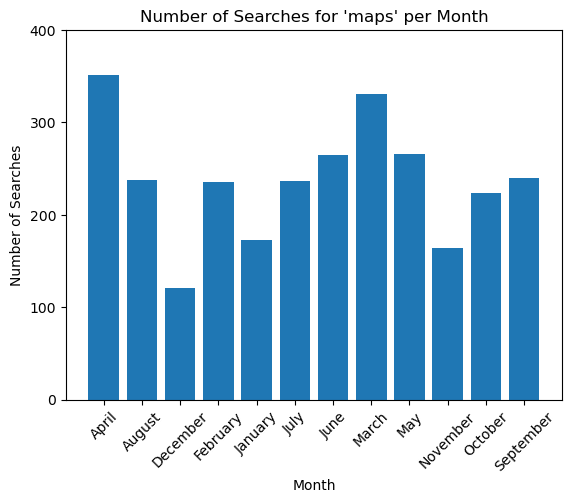

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
endpoint = 'https://data.nashville.gov/resource/fuaa-r5cm.json'
params = {
    "query_text": "maps"
}
response = requests.get(endpoint, params=params)
res = response.json()
query_results = pd.DataFrame(res)
# Convert the "query_count" column to numeric
query_results["query_count"] = pd.to_numeric(query_results["query_count"])
# Group the data by the "year" and "month_name" columns and calculate the sum of query_count for each month
maps_monthly_counts = query_results.groupby(["year", "month_name"])["query_count"].sum().reset_index()
# Create a bar chart to visualize the number of times "maps" was searched in a month
plt.bar(maps_monthly_counts["month_name"], maps_monthly_counts["query_count"])
plt.xlabel("Month")
plt.ylabel("Number of Searches")
plt.title("Number of Searches for 'maps' per Month")
plt.xticks(rotation=45)
# Calculate the maximum query count and round it up to the nearest multiple of 100
max_count = max(maps_monthly_counts["query_count"])
max_count_rounded = np.ceil(max_count / 100) * 100
# Set the y-axis tick locations and labels
tick_values = np.arange(0, max_count_rounded + 1, 100)
plt.yticks(tick_values)
plt.show()